In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [57]:
data = datasets.load_boston()
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [58]:
X = pd.DataFrame(data.data, columns=data.feature_names) 

In [59]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [60]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [61]:
Y=datasets.load_boston().target

In [62]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [64]:
sc = StandardScaler()

In [65]:
X_train_norm = sc.fit_transform(X_train)
X_test_norm = sc.transform(X_test)

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [81]:
lr = LinearRegression()
scores = cross_val_score(lr, X_train_norm, Y_train, cv=5, scoring='neg_mean_squared_error')
lr.fit(X_train_norm,Y_train)
y_pred = lr.predict(X_test_norm)
print(scores)
print(scores.mean())
print(mean_squared_error(Y_test,Y_pred))

[-26.35093652 -19.77143231 -23.23929929 -26.54793739 -22.18349982]
-23.618621067476262
17.33293805486909


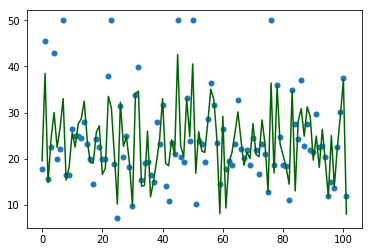

In [68]:

plt.plot(Y_test, 'o', markersize = 5)
plt.plot(y_pred, c='darkgreen')
plt.show()

In [76]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [77]:
model = DecisionTreeRegressor()
params = {'max_depth' : [4,5,6,7,8,9,10] }
grid = GridSearchCV(model,param_grid=params,cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_norm,Y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
Y_pred = grid.best_estimator_.predict(X_test_norm)
mean_squared_error(Y_test,Y_pred)

-15.784164137722138
{'max_depth': 6}
DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')


17.33293805486909

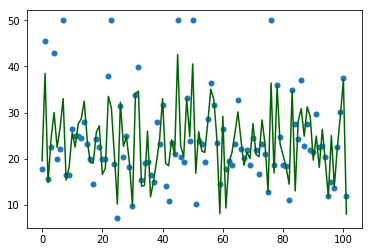

In [78]:
plt.plot(Y_test, 'o', markersize = 5)
plt.plot(y_pred, c='darkgreen')
plt.show()

In [82]:
model = RandomForestRegressor()
params = {'n_estimators':[10,20,50,200], 'max_depth' : [4,5,6,7,8,9,10] }
grid = GridSearchCV(model,param_grid=params,cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train_norm,Y_train)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)
Y_pred = grid.best_estimator_.predict(X_test_norm)
mean_squared_error(Y_test,Y_pred)

-10.527853506715955
{'max_depth': 9, 'n_estimators': 50}
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


11.248587419310919

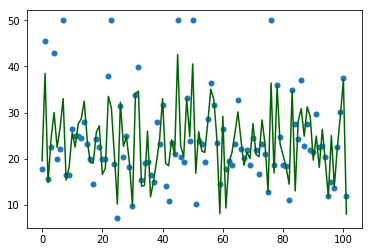

In [83]:
plt.plot(Y_test, 'o', markersize = 5)
plt.plot(y_pred, c='darkgreen')
plt.show()